In [26]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [41]:
data_batch=[]
for i in range(1,6):
    data_batch.append(unpickle('cifar-10-batches-py/data_batch_'+str(i)))
data_batch.append(unpickle('cifar-10-batches-py/test_batch'))

In [70]:
label_names=unpickle('cifar-10-batches-py/batches.meta')[b'label_names']
label_names

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [42]:
data=[]
for i in range(len(data_batch)):
    data=np.append(data,data_batch[i][b'data'])
data=np.reshape(data,(60000,3072))
data.shape

(60000, 3072)

In [43]:
labels=np.array([],dtype=int)
for i in range(len(data_batch)):
    labels=np.append(labels,data_batch[i][b'labels'])
labels=np.reshape(labels,60000)
labels=np.array(labels,dtype=int)
len(labels)

60000

In [44]:
dataByCat=[[],[],[],[],[],[],[],[],[],[]] 
for ind,l in enumerate(labels):
    dataByCat[l].append(data[ind])

In [71]:
def printImage(data):
    r=data[:1024]
    g=data[1024:2048]
    b=data[2048:]
    new_r=np.reshape(r,(32,32))
    new_g=np.reshape(g,(32,32))
    new_b=np.reshape(b,(32,32))
    im=np.dstack((new_r,new_g,new_b))
    print(im.shape)
    plt.imshow(im)
    plt.show()

(32, 32, 3)


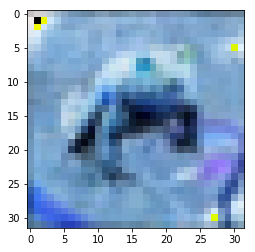

In [72]:
printImage(data[0])

In [66]:
mean_images=[]
mean_var_ratio=[]
tr_data=[[],[],[],[],[],[],[],[],[],[]] 
for cat in range(len(dataByCat)):
    pca=PCA(n_components=20)
    pca.fit(dataByCat[cat])
    tr_data[cat]=np.append(tr_data[cat],pca.transform(dataByCat[cat]))
    mean_images.append(pca.mean_)
    mean_var_ratio.append(pca.explained_variance_ratio_)

In [65]:
mean_var_ratio[0]

array([ 0.3497066 ,  0.12391284,  0.06152857,  0.05332772,  0.03035142,
        0.02177949,  0.02134457,  0.01832662,  0.0133255 ,  0.01103754,
        0.01082082,  0.01038155,  0.00928397,  0.0086913 ,  0.0078526 ,
        0.0072347 ,  0.00679935,  0.00608438,  0.00589063,  0.0053538 ])